In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap
from mplcursors import cursor


LOCATION_PROCESSED = 'data_processed'
LOCATION_SURVEY = f'{LOCATION_PROCESSED}/survey_features.csv'
LOCATION_QUESTIONS = f'{LOCATION_PROCESSED}/questions_processed.csv'


In [2]:
# load the survey data
survey = pd.read_csv(LOCATION_SURVEY, index_col=0)
# columns_used = ['age', 'gender_Female', 'gender_Male', 'gender_Other', 'continent_Europe', 'continent_North America', 'continent_Other']
# survey = survey[columns_used]
survey.head()

,age,femaleness,european,field_technology,shopaholism,category_appearance
0,0.166667,-0.5,1,0,0.433333,0.000000
1,0.333333,0.5,0,0,0.633333,0.000000
2,0.333333,-0.5,1,1,0.100000,0.000000
3,0.333333,-0.5,1,1,0.466667,0.333333
4,0.333333,-0.5,1,0,0.483333,0.500000


In [3]:

# set random seed
random_seed = 42

# standardize the data
scaler = StandardScaler()
survey_scaled = scaler.fit_transform(survey, survey.columns)
survey_scaled = pd.DataFrame(survey_scaled, columns=survey.columns)

# for all columns, print the value counts before and after scaling
for column in survey.columns:
    print(f'{"-"*20}{column}{"-"*20}')
    print("BEFORE SCALING:")
    print(survey[column].value_counts())
    print(f"Mean: {survey[column].mean()}")
    print(f"Std: {survey[column].std()}")
    print()

    print("AFTER SCALING:")
    print(survey_scaled[column].value_counts())

    print(f"Mean: {survey_scaled[column].mean()}")
    print(f"Std: {survey_scaled[column].std()}")
    print()

--------------------age--------------------
BEFORE SCALING:
age
0.333333    98
0.166667    76
0.500000    15
0.666667     8
0.833333     6
1.000000     1
Name: count, dtype: int64
Mean: 0.31454248366013066
Std: 0.16141430828675163

AFTER SCALING:
age
 0.116700    98
-0.918380    76
 1.151780    15
 2.186860     8
 3.221939     6
 4.257019     1
Name: count, dtype: int64
Mean: 1.6544499974806255e-16
Std: 1.0024600283175307

--------------------femaleness--------------------
BEFORE SCALING:
femaleness
 0.5    97
-0.5    93
 0.0    14
Name: count, dtype: int64
Mean: 0.00980392156862745
Std: 0.48362543091008886

AFTER SCALING:
femaleness
 1.016080    97
-1.056723    93
-0.020322    14
Name: count, dtype: int64
Mean: 3.483052626275001e-17
Std: 1.0024600283175307

--------------------european--------------------
BEFORE SCALING:
european
1    127
0     77
Name: count, dtype: int64
Mean: 0.6225490196078431
Std: 0.4859416459818263

AFTER SCALING:
european
 0.778652    127
-1.284270     77
Name:

[[0.000e+00 1.434e-01 6.218e-01 1.492e-01 4.317e-01 3.889e-01]
 [1.434e-01 0.000e+00 0.000e+00 0.000e+00 1.000e-04 0.000e+00]
 [6.218e-01 0.000e+00 0.000e+00 1.000e-04 9.000e-04 2.906e-01]
 [1.492e-01 0.000e+00 1.000e-04 0.000e+00 1.707e-01 1.640e-02]
 [4.317e-01 1.000e-04 9.000e-04 1.707e-01 0.000e+00 1.000e-03]
 [3.889e-01 0.000e+00 2.906e-01 1.640e-02 1.000e-03 0.000e+00]]
Bonferroni: 0.001388888888888889
[[ True False False False False False]
 [False  True  True  True  True  True]
 [False  True  True  True  True False]
 [False  True  True  True False False]
 [False  True  True False  True  True]
 [False  True False False  True  True]]


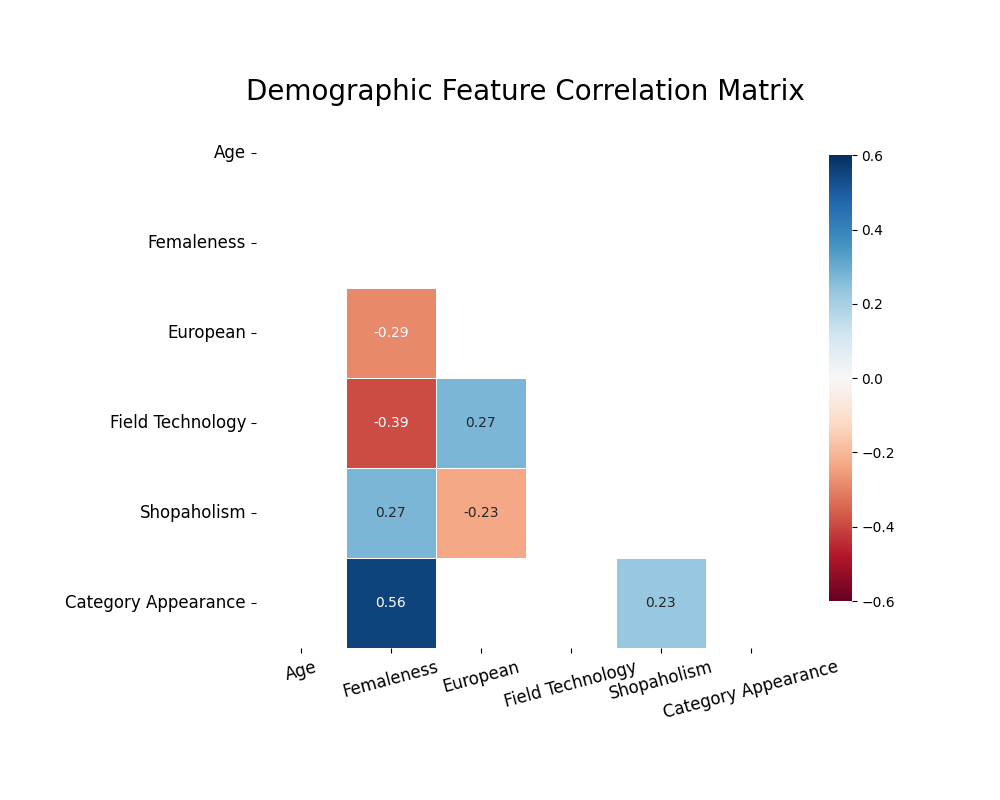

In [15]:
# covariance matrix
import numpy as np

corr = survey_scaled.corr(method='pearson')

# p values
from scipy.stats import pearsonr

p_values = np.zeros_like(corr)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        p_values[i, j] = pearsonr(survey_scaled.iloc[:, i], survey_scaled.iloc[:, j])[1]


# 2 decimals
p_values = np.round(p_values, 4)
print(p_values)

p_values_formatted = [[f'p={p:.2f}' for p in row] for row in p_values]

# perform bonferroni correction
alpha = 0.05
bonferroni = alpha / (corr.shape[0] * corr.shape[1])
print(f'Bonferroni: {bonferroni}')
significant = p_values < bonferroni
print(significant)

significant = significant.astype(bool)

# plot the correlation matrix
trimask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
plt.title('Demographic Feature Correlation Matrix', fontsize=20)
sns.heatmap(corr, mask=~significant | trimask , cmap='RdBu', fmt=".2f", vmin=-0.6, vmax=0.6, center=0, square=True, cbar_kws={"shrink": 0.8}, linewidths=0.5, annot=True)

# style ticks
plt.xticks(fontsize=12, rotation=20)
plt.yticks(fontsize=12, rotation=0)

#subtitle

# captitalize the column names
column_names = [column.replace('_', ' ').title() for column in survey.columns]
plt.xticks(ticks=np.arange(len(column_names))+0.5, labels=column_names, rotation=15, )
plt.yticks(ticks=np.arange(len(column_names))+0.5, labels=column_names, rotation=0)

# save the figure
plt.tight_layout(pad=5)
plt.savefig(f'{LOCATION_PROCESSED}/correlation_matrix_demo.png', dpi=500)
plt.show()

         age  femaleness  european  field_technology  category_appearance
0   -0.91838   -1.056723  0.778652         -0.778652            -1.106405
1    0.11670    1.016080 -1.284270         -0.778652            -1.106405
2    0.11670   -1.056723  0.778652          1.284270            -1.106405
3    0.11670   -1.056723  0.778652          1.284270            -0.181351
4    0.11670   -1.056723  0.778652         -0.778652             0.281176
..       ...         ...       ...               ...                  ...
199  0.11670   -1.056723  0.778652          1.284270            -1.106405
200  0.11670    1.016080  0.778652          1.284270             0.743704
201 -0.91838   -1.056723  0.778652         -0.778652            -0.181351
202  0.11670    1.016080  0.778652         -0.778652             0.281176
203  0.11670    1.016080  0.778652         -0.778652             1.668758

[204 rows x 5 columns]
Coefficients: [-6.01310507e-15 -4.96766900e-01 -8.15242405e-02  2.55950839e-02
  1.36339

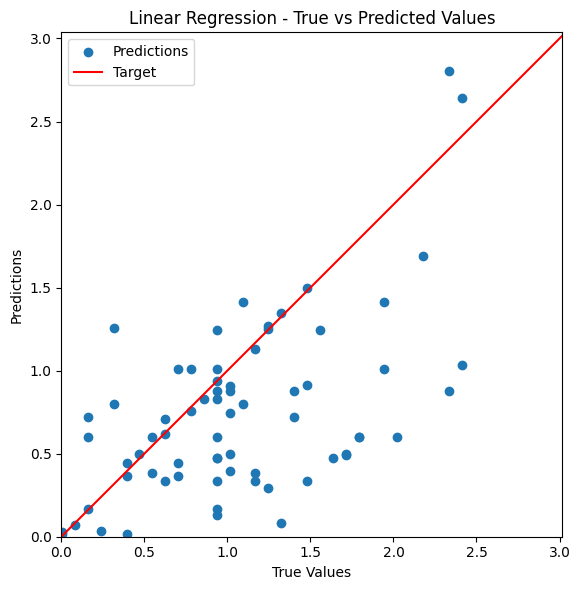

In [5]:
# fit a simple model survey_scaled

y_column = "shopaholism"
y = survey_scaled[y_column]
# softmax y
# y = y.apply(lambda x: 1 if x > 0 else 0)
X = survey_scaled.drop(columns=y_column)
print(X)

# # fit a simple model
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# linear regression
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# model = LinearRegression()
# model.fit(X, y)
# y_pred = model.predict(X)

# try with polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(4), LinearRegression())
model.fit(X, y)
y_pred = model.predict(X)


# print the coefficients
print(f'Coefficients: {model.named_steps["linearregression"].coef_}')
mean_squared_error = np.mean((y - y_pred) ** 2)

# print R^2
print(f'R^2: {model.score(X, y)}')

# p values
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


print(f'Mean Squared Error: {mean_squared_error}')

# plot the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], color='red')
plt.title('Linear Regression - True vs Predicted Values')
plt.tight_layout()
# legend
plt.legend(['Predictions', 'Target'], loc='upper left')
plt.savefig(f'{LOCATION_PROCESSED}/linear_regression.png')
plt.show()

/Users/adamlass/anaconda3/envs/reddit/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/adamlass/anaconda3/envs/reddit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/reddit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/adamlass/anaconda3/envs/reddit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarnin

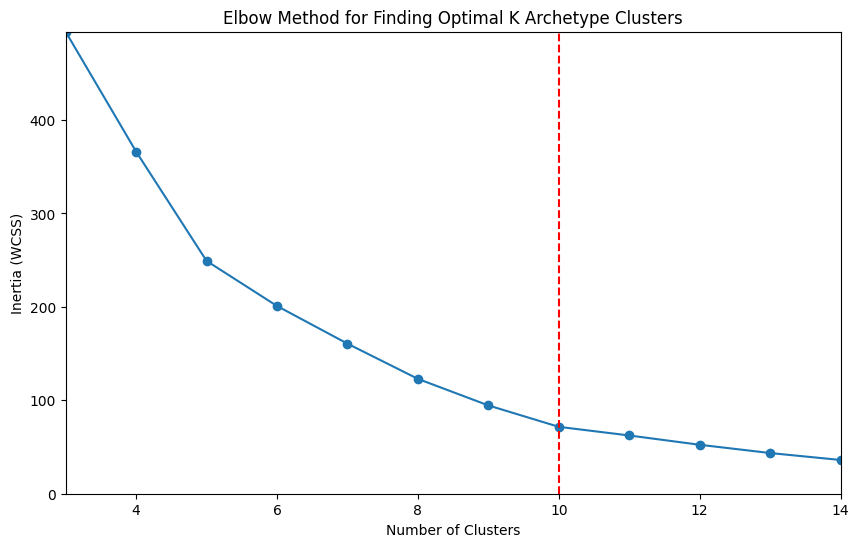

In [6]:
umapper = umap.UMAP(n_components=2, n_neighbors=15, random_state=random_seed)
survey_umap = umapper.fit_transform(survey_scaled)

# find k using elbow method
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(survey_umap)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), inertia, marker='o')
# y range
plt.ylim([0, inertia[2]])
plt.xlim([3, 14])
plt.title('Elbow Method for Finding Optimal K Archetype Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')

# vertical line at 10
plt.axvline(x=10, color='red', linestyle='--')

plt.savefig(f'{LOCATION_PROCESSED}/elbow_method_archetypes.png', dpi=500)
plt.show()

In [7]:
def format_annotation(row):

    return row

def select_annotation(sel, dataframe):
    index = int(sel.index)
    sel.annotation.set_text(format_annotation(dataframe.iloc[index]))
    sel.annotation.get_bbox_patch().set_facecolor("black")  # Set background color to black
    sel.annotation.get_bbox_patch().set_alpha(0.9)          # Set background color transparency to 90%
    sel.annotation.set_fontsize(10)  # Set font size to 10
    # set text color to white
    sel.annotation.set_color("white")
    sel.annotation.get_bbox_patch().set_edgecolor("black")  # Optionally, set border color
    sel.annotation.get_bbox_patch().set_linewidth(1.5)      # Optionally, set border width

In [8]:
survey_scaled

,age,femaleness,european,field_technology,shopaholism,category_appearance
0,-0.91838,-1.056723,0.778652,-0.778652,0.160507,-1.106405
1,0.11670,1.016080,-1.284270,-0.778652,1.091598,-1.106405
2,0.11670,-1.056723,0.778652,1.284270,-1.391312,-1.106405
3,0.11670,-1.056723,0.778652,1.284270,0.315689,-0.181351
4,0.11670,-1.056723,0.778652,-0.778652,0.393280,0.281176
...,...,...,...,...,...,...
199,0.11670,-1.056723,0.778652,1.284270,-1.391312,-1.106405
200,0.11670,1.016080,0.778652,1.284270,0.936416,0.743704
201,-0.91838,-1.056723,0.778652,-0.778652,-0.305039,-0.181351
202,0.11670,1.016080,0.778652,-0.778652,0.548462,0.281176


/Users/adamlass/anaconda3/envs/reddit/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


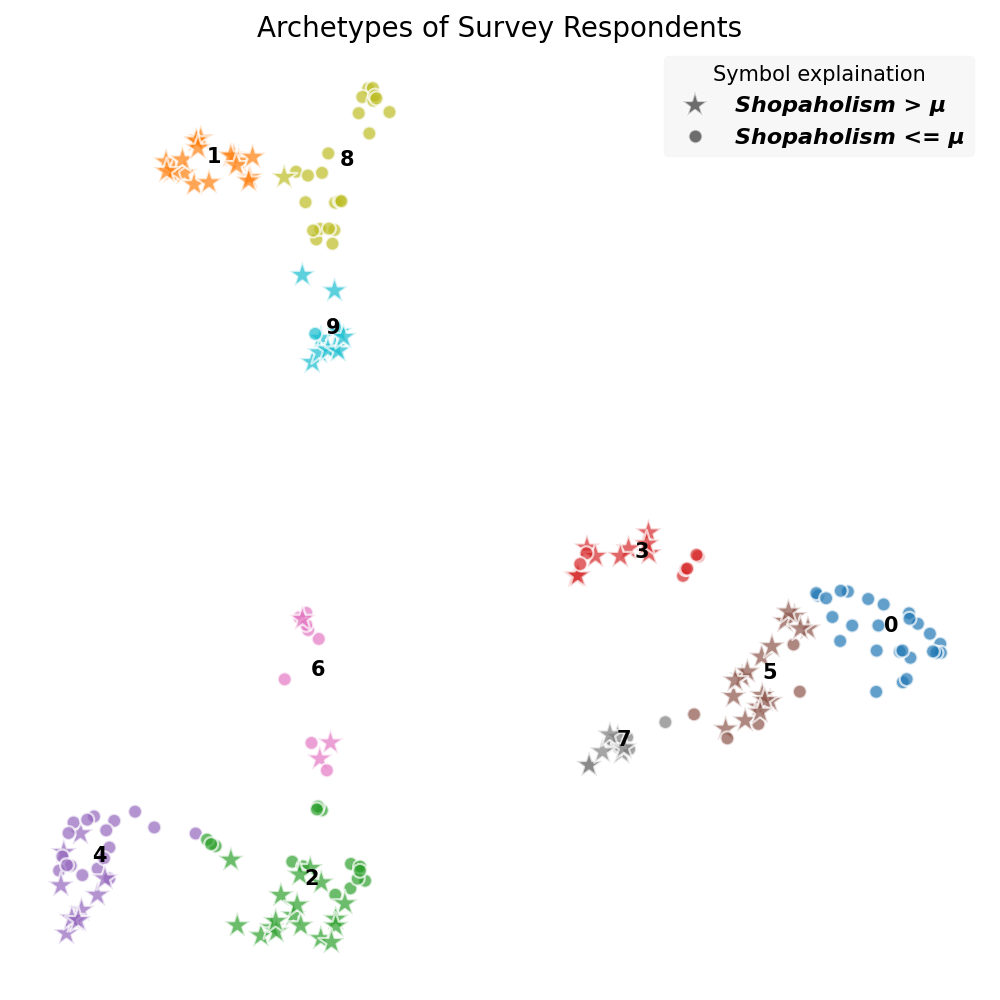

In [9]:
%matplotlib widget

K = 10
# kmeans clustering
kmeans = KMeans(n_clusters=K, random_state=random_seed)
clusters = kmeans.fit_predict(survey_umap)

# plot the data
fig, ax = plt.subplots(figsize=(10, 10))

# marker depends on the shopaholism column
styles = list(survey_scaled['shopaholism'].apply(lambda x: 'Shopaholism > μ' if x > 0 else 'Shopaholism <= μ'))

sns.scatterplot(x=survey_umap[:, 0], y=survey_umap[:, 1], hue=clusters, palette='tab10', s=400, alpha=0.7, ax=ax, style=styles, markers=['*', '.'])

    
plt.title('Archetypes of Survey Respondents', fontsize=20)
# plt.legend(title='Symbols', loc='upper right', prop={'size': 25})

crs = cursor(ax, hover=True, highlight=True)
crs.connect("add", lambda sel: select_annotation(sel, survey_scaled))

#format cluster legends with n 
handles, labels = ax.get_legend_handles_labels()
zipped = zip(labels, handles)
zipped = [(label, handle) for label, handle in zipped if len(label) >= 2]
labels, handles = zip(*zipped)



# clean style, background color black, text white
ax.legend(handles, labels, title='Symbol explaination', loc='upper right', prop={'size': 16, 'weight': 'bold', 'style': 'italic'}, facecolor='#F5F5F5', edgecolor='#F5F5F5', title_fontsize=15)


# insert cluster index at the centroid locations
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    # print(i, ":", centroid)
    ax.text(centroid[0], centroid[1], str(i), fontsize=15, color='black', fontweight='bold')

# set background color
# fig.set_facecolor('#F5F5F5')

# remove the axis
plt.axis('off')
plt.tight_layout()

# save the figure
plt.savefig(f'{LOCATION_PROCESSED}/umap_survey.png', dpi=500)
plt.show()

In [10]:
# print the cluster centers
cluster_centers = pd.DataFrame(umapper.inverse_transform(kmeans.cluster_centers_), columns=survey.columns)

# inverse transform all the columns to get the original values
cluster_centers

,age,femaleness,european,field_technology,shopaholism,category_appearance
0,0.065596,-1.056813,0.778676,1.284371,-0.925450,-1.106457
1,-0.837610,1.027483,-1.277684,-0.790188,1.773317,0.240051
2,-0.343707,1.116957,0.874466,-0.886828,0.014055,0.622094
3,-0.079544,-0.021125,-1.385575,1.383969,1.182071,-0.304675
4,0.093385,-1.061045,0.780575,-0.780267,-0.311117,-0.395320
5,0.133650,-0.959697,0.785621,1.288754,0.435652,-0.442942
6,2.292402,-0.821119,-1.015540,-0.822220,-0.986856,-1.148372
7,-0.151306,0.897660,0.873825,1.381819,0.711499,1.492856
8,-0.135501,1.106906,-1.371223,-0.865260,-0.775071,0.498353
9,-0.176712,-0.603066,-1.418006,-0.918665,0.721428,-0.472815


In [11]:
# truncate the values to 2 decimals
cluster_centers = cluster_centers.round(2)

In [12]:
# move shopaholism to the first column
shopaholism = cluster_centers.pop('shopaholism')
cluster_centers.insert(0, 'shopaholism', shopaholism)

In [13]:
# sort by decending shopaholism, keeping the standard scale
cluster_centers = cluster_centers.sort_values(by='shopaholism', ascending=False)
cluster_centers

,shopaholism,age,femaleness,european,field_technology,category_appearance
1,1.77,-0.84,1.03,-1.28,-0.79,0.24
3,1.18,-0.08,-0.02,-1.39,1.38,-0.30
9,0.72,-0.18,-0.60,-1.42,-0.92,-0.47
7,0.71,-0.15,0.90,0.87,1.38,1.49
5,0.44,0.13,-0.96,0.79,1.29,-0.44
2,0.01,-0.34,1.12,0.87,-0.89,0.62
4,-0.31,0.09,-1.06,0.78,-0.78,-0.40
8,-0.78,-0.14,1.11,-1.37,-0.87,0.50
0,-0.93,0.07,-1.06,0.78,1.28,-1.11
6,-0.99,2.29,-0.82,-1.02,-0.82,-1.15


In [14]:
# cluster counts
cluster_counts = pd.Series(clusters).value_counts().sort_index()
cluster_counts

0    26
1    19
2    34
3    16
4    28
5    23
6    11
7    12
8    24
9    11
Name: count, dtype: int64